In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
normalpath = "drive/MyDrive/VijayV_Persuasion_Strategies_Project/"

Mounted at /content/drive


In [ ]:
#!/usr/bin/env python


import tensorflow as tf
import os
import random
import numpy as np
import json

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.transform import rotate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3




In [ ]:
imagedetectablestrats = ["Active", "Amazed", "Eager", "Fashionable", "Feminine","Cheerful"]

trainimages = {}
testimages = {}

f = open('drive/MyDrive/VijayV_Persuasion_Strategies_Project/annotations_file_train_set.json', 'r')
train_data = json.load(f)
f = open('drive/MyDrive/VijayV_Persuasion_Strategies_Project/annotations_test_set.json', 'r')
test_data = json.load(f)

for i in train_data:
    strategies = []
    strategies.append(train_data[i]['First Persuasion'].split(" ")[0])
    strategies.append(train_data[i]['Second Persuasion'].split(" ")[0])
    strategies.append(train_data[i]['Third Persuasion'].split(" ")[0])
    sids = ""
    for strat in strategies:
      if strat in imagedetectablestrats:
        sids = strat
        break
    if sids!="":
      trainimages.update({i.split("/")[1]:sids})
for i in test_data:
    strategies = []
    strategies.append(test_data[i]['First Persuasion'].split(" ")[0])
    strategies.append(test_data[i]['Second Persuasion'].split(" ")[0])
    strategies.append(test_data[i]['Third Persuasion'].split(" ")[0])
    sids = ""
    for strat in strategies:
      if strat in imagedetectablestrats:
        sids = strat
        break
    if sids!="":
      testimages.update({i.split("/")[1]:sids})
allimages = dict.copy(trainimages)
allimages.update(testimages)

In [ ]:
binary_mask_ids = next(os.walk(normalpath+"binary_masks/"))[2]
image_ids = []
for id_ in binary_mask_ids:
    image_ids.append(id_[5:-4])
print(image_ids)
# for train_id in train_ids:
#     try:
#         print(allimages[train_id+'.jpg'])
#     except:
#         print(allimages[train_id+'.png'])
stratToImageIDList = {}
for strat in imagedetectablestrats:
    stratlist = []
    for image_id in image_ids:
        try:
            imStrat = allimages[image_id+'.jpg']
        except:
            imStrat = allimages[image_id+'.png']
        if imStrat == strat:
            stratlist.append(image_id)
    stratToImageIDList[strat] = stratlist
train_ids = []
test_ids = []
for strat in imagedetectablestrats:
    training_data, testing_data = train_test_split(stratToImageIDList[strat], test_size=0.2, random_state=42)
    train_ids.extend(training_data)
    train_ids.extend(testing_data)
print(len(image_ids))





['15033', '18862', '22263', '49034', '106062', '106993', '109416', '109475', '119741', '123770', '123831', '124174', '125333', '136171', '136509', '138001', '141807', '152775', '152904', '154741', '161130', '173749', '174578', '175704', '4154', '18779', '23780', '31812', '33390', '36075', '37728', '49371', '100536', '106628', '106765', '107013', '110304', '121157', '121446', '123596', '133746', '135987', '137446', '141771', '144811', '149561', '152849', '155283', '159521', '170126', '17706', '22057', '33539', '33640', '37651', '57701', '105778', '106655', '110210', '159907', '159915', '159962', '171670', '175274', '177540', '13146', '13209', '13328', '24609', '24793', '34717', '110369', '119071', '126464', '127314', '128996', '140474', '149207', '149498', '149499', '149785', '149838', '149914', '150217', '160050', '172956', '177399', '1359', '1630', '13546', '15909', '16047', '24777', '24828', '32717', '41819', '109865', '116184', '116944', '125287', '129256', '140257', '162846', '1635

<ipython-input-12-364c6493b649>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((3*len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)


Resizing training images and masks


100%|██████████| 260/260 [01:54<00:00,  2.28it/s]


resizing horizontal flipped training images and masks


100%|██████████| 260/260 [01:56<00:00,  2.24it/s]


resizing vertical flipped training images and masks


100%|██████████| 260/260 [01:50<00:00,  2.35it/s]


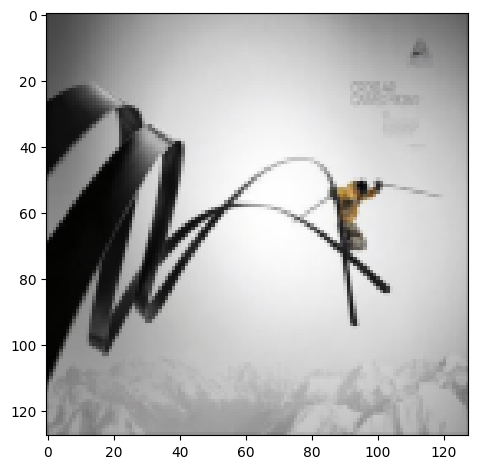

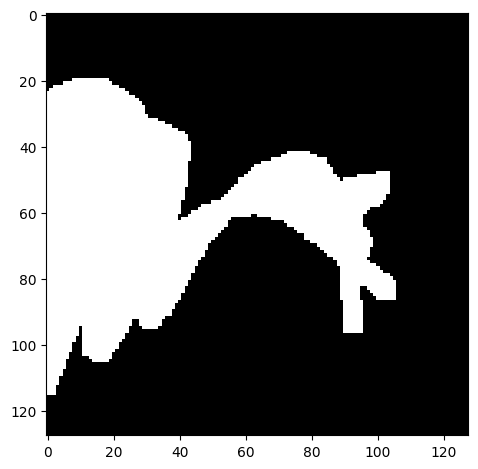

In [ ]:
path = normalpath


X_train = np.zeros((3*len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((3*len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    try:
        img = imread(path + 'train_images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    except:
        img = imread(path + 'train_images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = imread(path + 'binary_masks/mask_' + id_ + '.png')
    mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
    Y_train[n] = mask

#ADDING HORIZONTAL FLIPPED IMAGES FOR DATA AUGMENTATION
print('resizing horizontal flipped training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    try:
        img = imread(path + 'train_images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    except:
        img = imread(path + 'train_images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS]
    img = np.fliplr(img)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n+len(train_ids)] = img  #Fill empty X_train with values from img
    mask = imread(path + 'binary_masks/mask_' + id_ + '.png')
    mask = np.fliplr(mask)
    mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
    Y_train[n+len(train_ids)] = mask

#ADDING VERTICAL FLIPPED IMAGES FOR DATA AUGMENTATION
print('resizing vertical flipped training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    try:
        img = imread(path + 'train_images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    except:
        img = imread(path + 'train_images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS]
    img = np.flipud(img)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n+2*len(train_ids)] = img  #Fill empty X_train with values from img
    mask = imread(path + 'binary_masks/mask_' + id_ + '.png')
    mask = np.flipud(mask)
    mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
    Y_train[n+2*len(train_ids)] = mask

# test images
# X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# sizes_test = []
# print('Resizing test images')
# for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
#     try:
#         img = imread(path + 'train_images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
#     except:
#         img = imread(path + 'train_images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS]
#     sizes_test.append([img.shape[0], img.shape[1]])
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_test[n] = img

# print('Done!')

image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 128, 128, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  448         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

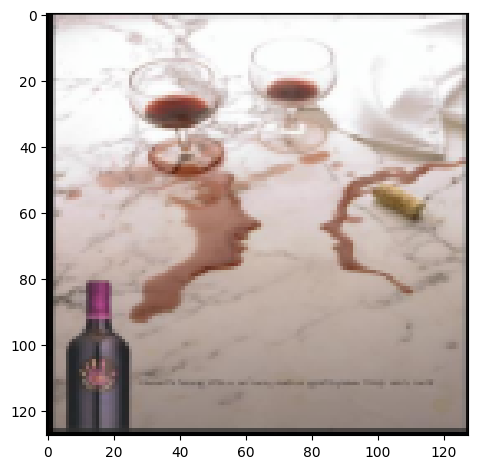

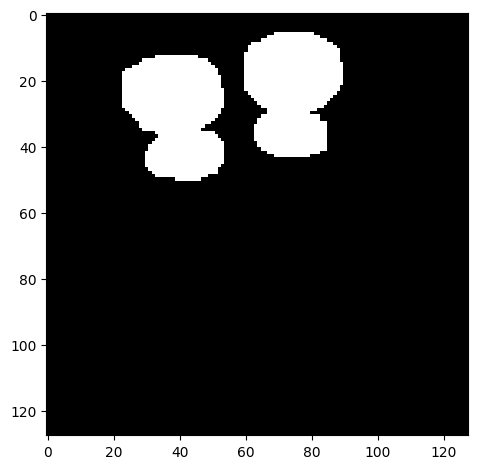

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


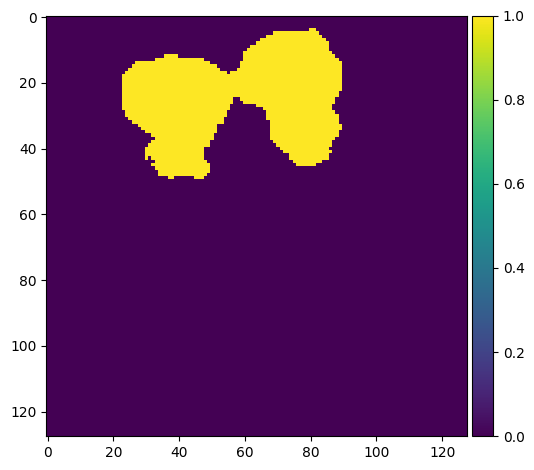

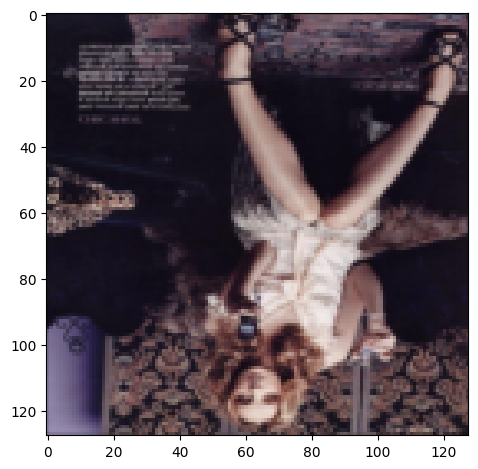

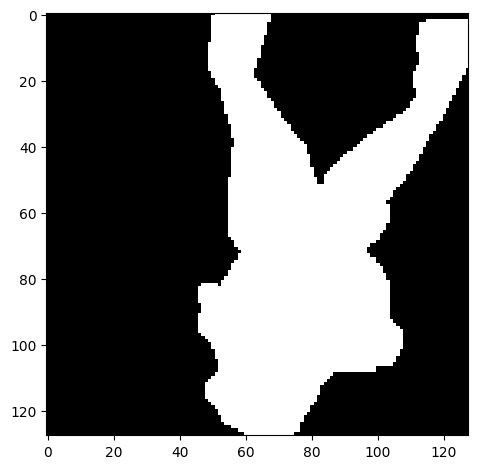

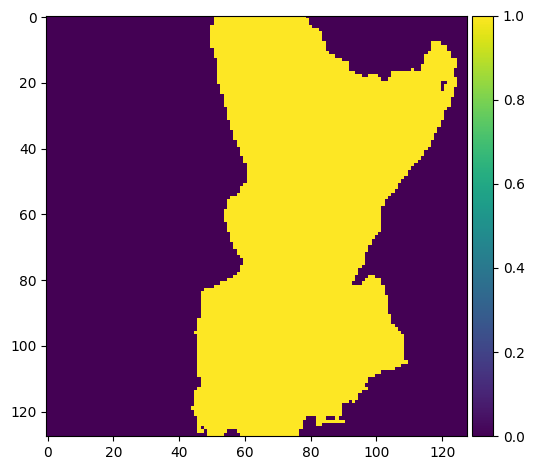

In [ ]:


#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.2)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.2)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.3)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.3)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.3)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.3)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

################################
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=100)

####################################

idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
# preds_test = model.predict(X_test, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
# preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()


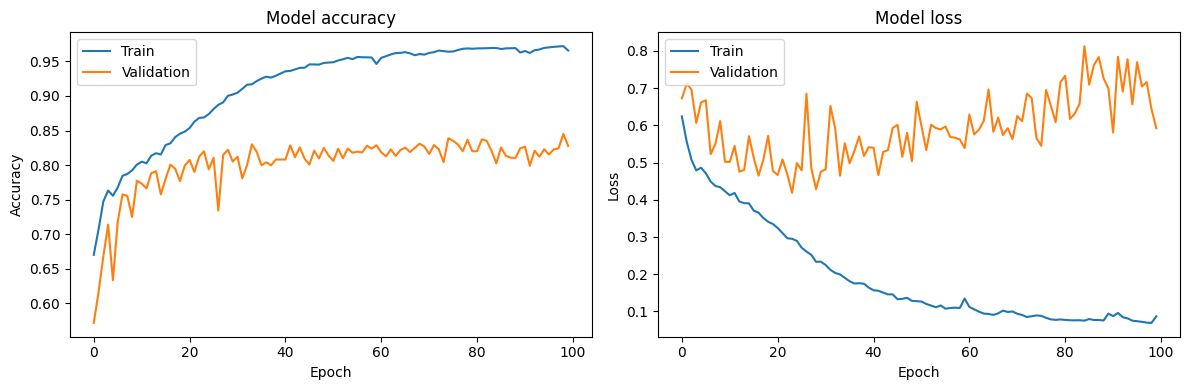

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
